In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import importlib 
import sys
sys.path.append('/home/alessandro-merenda/Scrivania/analisi_frodi/src')
import func
importlib.reload(func)

<module 'func' from '/home/alessandro-merenda/Scrivania/analisi_frodi/src/func.py'>

In [ ]:
df = pd.read_csv('//home/alessandro-merenda/Scrivania/analisi_frodi/data/processed/processed_data_resampled.csv')

df

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BG,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,credit_risk_score_plus_source,credit_risk_score_minus_source,credit_risk_score_plus_month,credit_risk_score_minus_month,fraud_bool
0,0.300000,0.986506,25.000000,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,...,False,False,False,False,False,163.000000,163.000000,163.000000,163.000000,0
1,0.800000,0.617426,89.000000,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,...,False,False,True,False,False,154.000000,154.000000,154.000000,154.000000,0
2,0.800000,0.996707,14.000000,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,...,False,False,False,True,False,89.000000,89.000000,89.000000,89.000000,0
3,0.600000,0.475100,14.000000,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,...,False,False,False,False,False,90.000000,90.000000,90.000000,90.000000,0
4,0.900000,0.842307,29.000000,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,...,False,False,True,False,False,91.000000,91.000000,91.000000,91.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977937,0.900000,0.619065,58.771850,41,0.029743,-0.925182,1696,5167.925348,4826.914866,5564.311917,...,False,False,False,True,False,220.969821,220.969821,222.562530,219.377112,1
1977938,0.713330,0.454298,57.066415,42,1.611969,-1.002064,2533,7561.947422,5218.417256,4949.857318,...,False,True,False,True,False,130.042861,130.042861,134.042861,126.042861,1
1977939,0.307528,0.449937,141.746601,25,0.007792,-0.627022,781,11503.715258,6660.654528,5548.434779,...,False,False,False,True,False,99.150555,99.150555,100.150555,98.150555,1
1977940,0.900000,0.737125,154.321900,36,0.002063,-0.559895,734,4455.653883,4662.473026,5344.084986,...,False,False,False,True,False,220.085840,220.085840,221.297496,218.874184,1


In [3]:
# Separazione delle features (X) e della variabile target (y)
X = df.drop(columns=['fraud_bool'])  # Colonna target
y = df['fraud_bool']

# Verifica delle dimensioni
print(f"Dimensioni di X: {X.shape}")
print(f"Dimensioni di y: {y.shape}")

Dimensioni di X: (1977942, 50)
Dimensioni di y: (1977942,)


In [4]:
# Suddivisione del dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verifica delle dimensioni
print(f"Dimensioni di X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensioni di X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensioni di X_train: (1384559, 50), y_train: (1384559,)
Dimensioni di X_test: (593383, 50), y_test: (593383,)


ROC-AUC: 0.9918619152822429


,precision,recall,f1-score,support
0,0.990759,0.992986,0.991871,296692.000000
1,0.992970,0.990738,0.991853,296691.000000
accuracy,0.991862,0.991862,0.991862,0.991862
macro avg,0.991864,0.991862,0.991862,593383.000000
weighted avg,0.991864,0.991862,0.991862,593383.000000


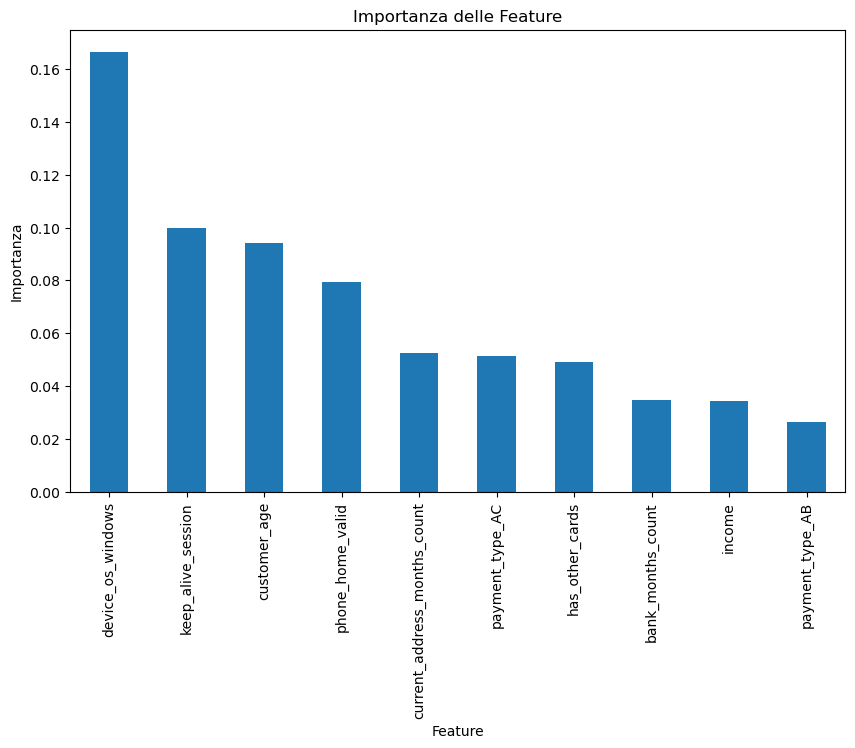

In [5]:
from func import train_random_forest, evaluate_model, plot_feature_importance


# Addestramento del modello Random Forest
rf_model = train_random_forest(X_train, y_train)

# Valutazione del modello
results = evaluate_model(rf_model, X_test, y_test)

# Stampa dei risultati
print("ROC-AUC:", results["roc_auc"])
display(results["classification_report"])  # Mostra il report come tabella

# Visualizzazione dell'importanza delle feature
plot_feature_importance(rf_model, X_train.columns)

In [ ]:
# Ridefinizione X_resampled e y_resampled dal DataFrame bilanciato
X_resampled = df.drop(columns=['fraud_bool'])  # Rimuovi la colonna target dal dataset
y_resampled = df['fraud_bool']  # Seleziona la colonna target

# Verifica dele dimensioni dei dati
print(f"Dimensioni di X_resampled: {X_resampled.shape}")
print(f"Dimensioni di y_resampled: {y_resampled.shape}")

Dimensioni di X_resampled: (1977942, 50)
Dimensioni di y_resampled: (1977942,)


In [7]:
from func import starfield_with_smote
from func import apply_smote


# Validazione incrociata
starfield_results = starfield_with_smote(
    X=X_resampled,  # Dati delle feature bilanciati
    y=y_resampled,  # Target bilanciato
    model=rf_model,  # RandomForest già definito
    smote_function=apply_smote,  # La funzione SMOTE
    k=10  # Numero di fold
)

# Risultati medi
print("Risultati medi della validazione incrociata con SMOTE:")
print(f"ROC-AUC medio: {starfield_results['roc_auc']:.4f}")
print(f"Precisione media: {starfield_results['precision']:.4f}")
print(f"Recall media: {starfield_results['recall']:.4f}")
print(f"F1-score medio: {starfield_results['f1_score']:.4f}")

INFO:root:Fold 1...
INFO:root:Fold 1 complete. ROC-AUC: 0.9992
INFO:root:Fold 2...
INFO:root:Fold 2 complete. ROC-AUC: 0.9992
INFO:root:Fold 3...
INFO:root:Fold 3 complete. ROC-AUC: 0.9992
INFO:root:Fold 4...
INFO:root:Fold 4 complete. ROC-AUC: 0.9992
INFO:root:Fold 5...
INFO:root:Fold 5 complete. ROC-AUC: 0.9993
INFO:root:Fold 6...
INFO:root:Fold 6 complete. ROC-AUC: 0.9991
INFO:root:Fold 7...
INFO:root:Fold 7 complete. ROC-AUC: 0.9992
INFO:root:Fold 8...
INFO:root:Fold 8 complete. ROC-AUC: 0.9992
INFO:root:Fold 9...
INFO:root:Fold 9 complete. ROC-AUC: 0.9991
INFO:root:Fold 10...
INFO:root:Fold 10 complete. ROC-AUC: 0.9992


Risultati medi della validazione incrociata con SMOTE:
ROC-AUC medio: 0.9992
Precisione media: 0.9925
Recall media: 0.9925
F1-score medio: 0.9925
